# Codificación afín 

Pincha en este <a href="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/imcod.png">enlace</a> para descargar una imagen.

Esta imágen está codificada con una transformación afín del tipo $$\mbox{imagen}_{i,j}\mapsto b*\mbox{imagen}_{i,j}+vector.$$
Todo módulo 256.

De la imágen original (sin codificar) sabemos que tenía dos puntos rojos, uno en la esquina superior izquierda y otro en la esquina inferior derecha.

## Ejercicios .- 

- Decodifica la imagen y muéstrala aquí.

- Localiza a la persona que aparece en la imagen. Para ello tendrás que ir a la consejería de la facultad de Ciencias por  las tardes y preguntar por la persona que aparece en la fotografía.

- Muestra la fotografía a la persona que has localizado y dile tu nombre. El te dará un código.

- Ese código es el resultado de codificar un mensaje, siguiendo el procedimiento de Vigenêre con esta <a href="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/matriz.txt"> matriz</a> y con una llave que tendréis que encontrar.

- Para encontrar la llave tendrás que mandar un wasa a un número de teléfono, identificarte y pedirle muy amablemente que te de la clave.

- El número de teléfono al que tendrás que mandar el wasa ha sido codificado utilizando el procedimiento RSA con llaves públicas $e=12343$ y 
$$n=1000000000000000000390001300000000000000000507$$ 
y el resultado es 
$$862987092548752514737921262586293739762725407
$$
 
- Si no eres capaz de decodificar el número de teléfono y viniste a clase el lunes 27 pincha <a href="http://www.ugr.es/%7Ebullejos/numeros/pista1.html" target="new">aquí</a>, si no viniste pincha <a href="http://www.ugr.es/%7Ebullejos/numeros/pista2.html" target="new">aquí</a>.

- Una vez decodificado el código, que te ha proporcionado la persona de la fotografía que has decodificado, verás que este es el nombre de una montaña. Averigua su altura y pincha en <a href="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/usuario.html" target="new">este enlace</a>. Entra con tu primer apellido (mayúsculas y sin acentos) como usuario y la altura de la montaña como contraseña. Entonces sigue las instrucciones.

# Práctica

In [12]:
## Cargamos los módulos necesarios para la práctica
# Módulo de tratamiento de imágenes PIL.
from PIL import Image
# Módulo de cálculo numérico numpy.
from numpy import array
# Módulo de cálculo simbólico sympy.
from sympy import *
# Módulo propio de criptografía
from criptoMRG import *

## Codificación de la imagen

Se nos ha dado una imagen codificada con una transformación afín del tipo siguiente en $\mathbb{Z}_{256}$: 

$$\mbox{imagen}_{i,j}\mapsto t*\mbox{imagen}_{i,j}+(r,g,b)$$

La cargaremos en memoria con el módulo PIL y la llevaremos a una matriz.

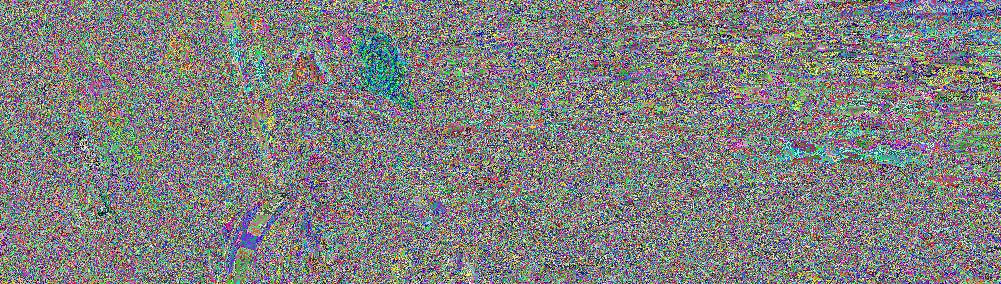

In [3]:
# Carga la imagen dada con el módulo PIL.
imag = Image.open('./imcod.png')
# Carga la imagen en una matriz
imagen = imag.copy()
# Muestra la imagen
imag

La pista que utilizamos para calcular la codificación de la imagen es que el punto de la esquina superior izquierda y el punto de la esquina inferior derecha eran puntos rojos. Podemos calcular entonces sus codificaciones buscándolos en la matriz.

In [5]:
# Ubicamos y obtenemos los dos puntos rojos
(n,m) = imagen.size
pixels = imagen.load()

# Nótese que los dos puntos rojos se han obtenido en las esquinas superior
# izquierda e inferior derecha.
pixels[0,0],pixels[n-1,m-1]

((1, 11, 222), (1, 11, 222))

Ahora que tenemos la codificación de un punto rojo, conocemos los siguientes datos sobre las claves con las que se ha codificado la imagen. Aplicando la codificación a un punto rojo `(255,0,0)`, obtenemos:

$$
\begin{aligned}
255 t + r \equiv_{256} 1 \\
0 t   + g \equiv_{256} 11 \\
0 t   + b \equiv_{256} 222 \\
\end{aligned}
$$

Desde donde deducimos que $g \equiv 11$ y $b \equiv 222$, además, tenemos la siguiente ecuación para $t$ y $r$:

$$
r-t \equiv_{256} 1
$$

Probaremos todas las decodificaciones posibles usando esos números. Generaremos las imágenes correspondientes a ellas y elegiremos la que sea correcta.

In [6]:
# Probamos todos los valores posibles para t y r.
for t in xrange(255):
    r = (t+1)%256
    g = 11
    b = 222
     
    if gcd(t, 256) == 1:
        nueva = afinimgDec(imagen, t, r, g, b)
        nueva.save("decodimages/imagen_{}.png".format(t), 'PNG')

# Observamos que la imagen 123 se decodifica correctamente, esto nos da un coeficiente 123

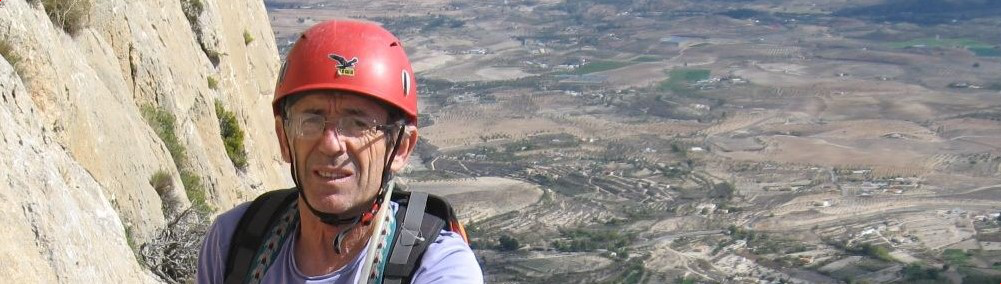

In [8]:
# Decodificación correcta
t = 123
r = (t+1)%256
g = 11
b = 222

afinimgDec(imagen, t,r,g,b)

## RSA

#### Factorización
Para decodificar RSA, necesitamos ser capaces de factorizar el módulo en el que se está trabajando y obtener la clave privada que forma el totiente del número. Para factorizarlo utilizaremos externamente 

In [8]:
# El módulo dado
n = 1000000000000000000390001300000000000000000507
# Factorizamos n externamente
p = 100000000000000000039
q = 10000000000000000000000013 
phi = (p-1)*(q-1)

1000000000000000000380001200000000000000000456L

#### Decodificación
Tenemos entonces calculado el totiente del módulo usado en la codificación, y además conocemos el exponente que se usó para codificar y el número codificado. Utilizaremos una función de nuestra librería para decodificarlo.

In [9]:
y   = 862987092548752514737921262586293739762725407L
e   = 12343

rsaDec(y,n,phi,e)

699132868L

## Vigenère

El mensaje que he encontrado tras llevar la imagen a conserjería es: **SHKXSHTJHKM**. Ese es el mensaje que debemos decodificar usando Vigenère.

In [10]:
# Cargamos la matriz dada
matrizdada = map(
list, 
"""UZEJOTYDINSXCHMRWBGLQVAFKP
ZEJOTYDINSXCHMRWBGLQVAFKPU
EJOTYDINSXCHMRWBGLQVAFKPUZ
JOTYDINSXCHMRWBGLQVAFKPUZE
OTYDINSXCHMRWBGLQVAFKPUZEJ
TYDINSXCHMRWBGLQVAFKPUZEJO
YDINSXCHMRWBGLQVAFKPUZEJOT
DINSXCHMRWBGLQVAFKPUZEJOTY
INSXCHMRWBGLQVAFKPUZEJOTYD
NSXCHMRWBGLQVAFKPUZEJOTYDI
SXCHMRWBGLQVAFKPUZEJOTYDIN
XCHMRWBGLQVAFKPUZEJOTYDINS
CHMRWBGLQVAFKPUZEJOTYDINSX
HMRWBGLQVAFKPUZEJOTYDINSXC
MRWBGLQVAFKPUZEJOTYDINSXCH
RWBGLQVAFKPUZEJOTYDINSXCHM
WBGLQVAFKPUZEJOTYDINSXCHMR
BGLQVAFKPUZEJOTYDINSXCHMRW
GLQVAFKPUZEJOTYDINSXCHMRWB
LQVAFKPUZEJOTYDINSXCHMRWBG
QVAFKPUZEJOTYDINSXCHMRWBGL
VAFKPUZEJOTYDINSXCHMRWBGLQ
AFKPUZEJOTYDINSXCHMRWBGLQV
FKPUZEJOTYDINSXCHMRWBGLQVA
KPUZEJOTYDINSXCHMRWBGLQVAF
PUZEJOTYDINSXCHMRWBGLQVAFK""".split("\n"))

# Empezando por el tejado

Usando el último enlace comprobamos que en HTML de la página tenemos el **script** siguiente:

~~~
<script>
completeAndRedirect=function(){
 var cadena="http://www.ugr.es/%7Ebullejos/numeros/alumnos/crip/"+document.forms[0].elements[0].value+document.forms[0].elements[1].value+".html";
 window.open(cadena,"nueva");
}		
</script>
~~~

Que nos indica que una vez que rellenemos el formulario con usuario y contraseña, lo que hará será redirigirnos a una página de la forma:

~~~
http://www.ugr.es/~bullejos/numeros/alumnos/crip/<apellido><alturamontaña>.html
~~~

Las alturas de las montañas se mueven en un rango no demasiado grande. Probaremos con las alturas menores que `9999`,
solicitando las distintas posibilidades al servidor.

In [ ]:
import os

for i in reversed(range(9999)):
    os.system('wget http://www.ugr.es/~bullejos/numeros/alumnos/crip/ROMAN' + str(i) + '.html')

#### Molamenqing
Obtenemos respuesta en la altura `7703`. Esa debe ser la altura de nuestra montaña y nuestra clave. El **Molamenqing** es el precisamente el pico que tiene esa misma altura.

#### Invirtiendo Vigenère
Si conocemos la clave de conserjería, que era **SHKXSHTJHKM**, podemos darle la vuelta a la práctica. Vamos a averigüar la clave que necesitamos obtener por Whatsapp por ingeniería inversa. Así, además, evitamos utilizar una aplicación propietaria (no es software libre) como Whatsapp.

In [9]:
vigenerestring = "UZEJOTYDINSXCHMRWBGLQVAFKP"

# ¡Nótese cómo coinciden las longitudes! Vamos por el buen camino.
montagna = "MOLAMENQING"
codifica = "SHKXSHTJHKM"

'gv|xgdgv|zg'

In [15]:
# Le damos la vuelta a la codificación, aprovechando que Vigenère es simétrico
# en la clave y el mensaje.
vigenereDec(codifica, matrizdada, montagna)

'ANTRAXANTRA'

In [17]:
# Comprobamos que efectivamente, es la clave usada
vigenereDec(codifica, matrizdada, "ANTRAX")

'MOLAMENQING'

Antropomórfico,
Natural,
Transgresor en las clases,
un poco Raro,
Apuesto,
Expecial

Antropomórfico, naturalmente. Trabajador resuelto aunque excéntrico. En clase, procura cuidar más su garganta que su estilo, pero acaba con muy particular estilo y muy mala garganta. Contrastan las canas con su juventud de espíritu. 